#### [Chapter 8](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_08.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_08.ipynb) -->

**Quadratic Integrate-and-Fire (QIF) and Theta Neurons**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package
# !pip install mndynamics

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.QIF_Base import QIF
from mndynamics.models.py.Theta_Base import Theta

In [2]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['k', 'g', 'b', 'y'])
plt.rcParams['figure.figsize'] = (10, 3.5)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['font.size'] = 16

In [3]:
obj = QIF()
obj()

(Normalized) quadratic integrate-and-fire (QIF) model


{'c': 1.0, 'tau_m': 10.0, 't_end': 100.0, 'i_ext': 0.11, 'v0': 0.0, 'dt': 0.01}

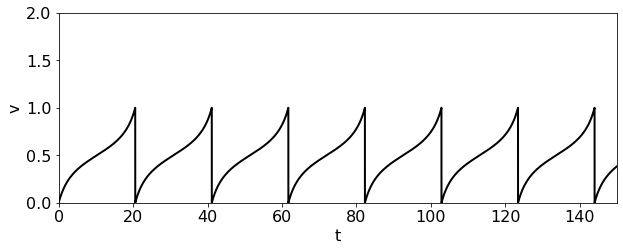

In [4]:
tspan = np.arange(0.0, 150.0, 0.01)
obj = QIF({"i_ext":0.15, "tau_m": 2.0})
data = obj.simulate(tspan)
t = data['t']
v = data['v']

fig, ax = plt.subplots(1)
ax.plot(t, v, lw=2, c="k")
ax.set_xlabel("t")
ax.set_ylabel("v")
ax.set_ylim((0.0, 2.0))
ax.set_xlim((0.0, 150.0));

Voltage trace of a QIF neuron. [`QIF_VOLTAGE_TRACE`].

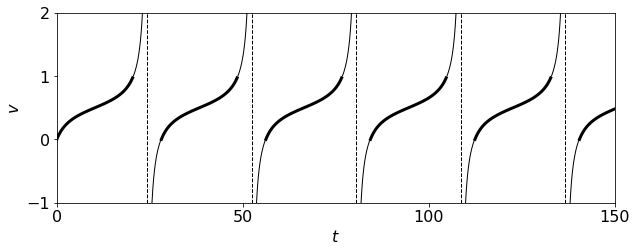

In [5]:
from numpy import sqrt, tan, arctan, pi

tau_m = 2
I = 0.15

T = 2*tau_m/sqrt(tau_m*I-1/4)*arctan(1/(2*sqrt(tau_m*I-1/4)))
t_ast = tau_m/sqrt(tau_m*I-1/4)*(pi/2-arctan(1/(2*sqrt(tau_m*I-1/4))))

t_period = np.arange(0, 100)/100*T
t = t_period
v_0_to_1 = 0.5+sqrt(tau_m*I-1/4)*tan(sqrt(tau_m*I-1/4) /
                                     tau_m*t - arctan(1/(2*sqrt(tau_m*I-1/4))))

t_blowup = np.arange(0, 99)/100*t_ast
t = t_blowup
v_1_to_inf = 0.5+sqrt(tau_m*I-1/4)*tan(sqrt(tau_m*I-1/4) /
                                       tau_m*t + arctan(1/(2*sqrt(tau_m*I-1/4))))

v_minus_inf_to_0 = 1-v_1_to_inf[::-1]


fig, ax = plt.subplots(1)
for ijk in range(0, 6):
    ax.plot(ijk*(T+2*t_ast)-t_ast+t_blowup, v_minus_inf_to_0, '-k', lw=1)
    ax.plot(ijk*(T+2*t_ast)+t_period, v_0_to_1, '-k', lw=3)
    ax.plot(ijk*(T+2*t_ast)+T+t_blowup, v_1_to_inf, '-k', lw=1)
    ax.plot([ijk*(T+2*t_ast)+T+t_ast, ijk*(T+2*t_ast)+T+t_ast],
         [-1, 2], '--k', lw=1)

ax.set_xlim((0, 150))
ax.set_ylim((-1, 2))
ax.set_xticks([0, 50, 100, 150])
ax.set_xlabel('$t$')
ax.set_ylabel('$v$');

In [6]:
obj = Theta()
obj()

Theta Neuron Model


{'c': 1.0, 'tau_m': 0.5, 't_end': 150.0, 'i_ext': 0.505, 'v0': 0.0, 'dt': 0.01}

In [7]:
tspan = np.arange(0.0, 150.0, 0.01)
data = obj.simulate(tspan)
t = data['t']
theta = data['v']

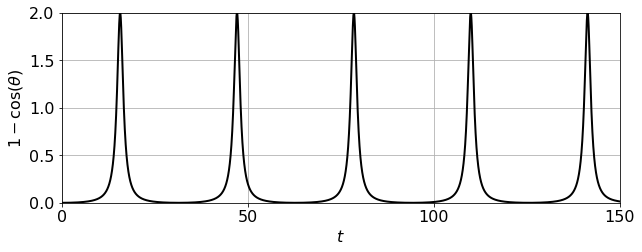

In [9]:
plt.figure(figsize=(10,3.5))
plt.plot(t,1.0-np.cos(theta))
plt.xlabel(r'$t$')
plt.ylabel(r'$1-\cos( \theta )$')
plt.ylim((0.0,2.0))
plt.xlim((0.0,150.0))
plt.xticks(np.arange(0, 151., step=50))
plt.yticks(np.arange(0, 2.1, step=.50))
plt.grid()
